# HW2. Критерии согласия, проверка нормальности, бутстреп
#### Ильичёв А.С., 693

In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
import pandas as pd

%matplotlib inline

## Задача 1

$p$-values:

- хи-квадрат 0.54
- Лиллиефорс 0.23
- $K^2$ 0.047
- Шапиро-Уилк 0.007

Мы имеем 4 критерия. Пусть уровень значимости каждого $\alpha$ (ограничение на вероятность ошибки первого рода). Вероятность того, что хотя бы один из них совершит ошибку 1 рода, сверху оценивается как $4\alpha$, потому что вероятность объединения событий меньше суммы вероятностей каждого. Критерием Шапиро-Уилка мы отвергаем гипотезу о нормальности на уровне значимости 0.007. Поэтому минимальный уровень значимости, при котором мы отвергаем гипотезу по совокупности этих критериев, будет не больше 0.028, что довольно мало. В частности, на стандартном уровне значимости 0.05 мы отвергаем гипотезу о нормальности.

## Задача 2

In [2]:
plt.rcParams['figure.figsize'] = (10, 7)

In [3]:
df = pd.read_csv("slump_test.data.txt")

In [4]:
df.head()

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [5]:
sample = np.array(df['Compressive Strength (28-day)(Mpa)'])

In [6]:
len(sample)

103

Построим гистограмму выборки и на том же графике плотность нормального распределения, построенного по выборочном среднему и дисперсии.

mean  36.03941747572816
variance  60.84139383542274


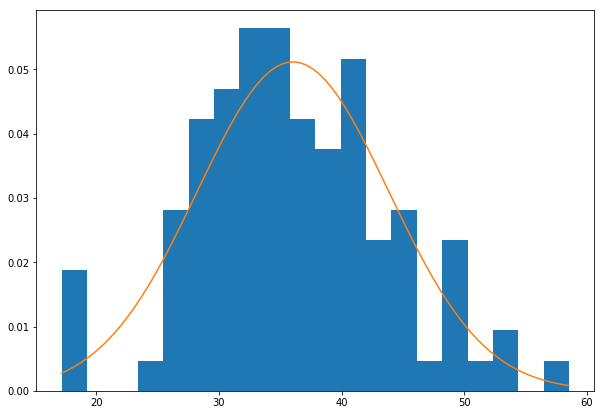

In [7]:
plt.hist(sample, density=True, bins=20);
xs = np.linspace(sample.min(), sample.max(), 1000)
mean = sample.mean()
std = sample.std()
print('mean ', mean)
print('variance ', std ** 2)
plt.plot(xs, sts.norm(mean, std).pdf(xs));

Из гистограммы можно сделать вывод, что выборка совсем немного скошена вправо и в целом похожа на нормальное распределение.


Построим QQ-plot.

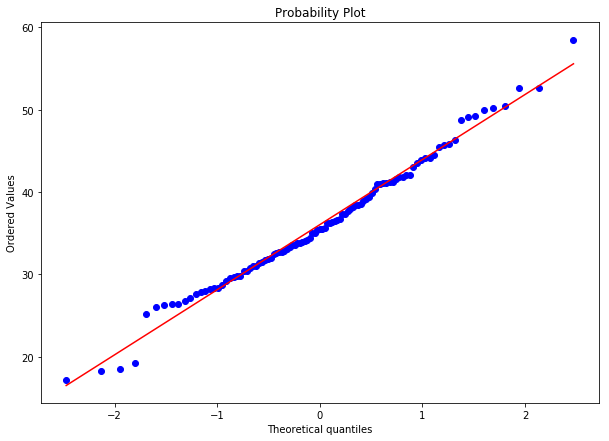

In [8]:
sts.probplot(sample, plot=plt);

По этому графику нельзя определенно сказать, что у распределения утяжелены относительно нормального хвосты в ту или иную сторону. Поэтому будем проверять гипотезу о нормальности выборки с помощью критерия Шапиро-Уилка на уровне значимости 0.05.

In [9]:
sts.shapiro(sample)

(0.9879489541053772, 0.48257023096084595)

Видим, что $p$-value значительно больше 0.05, поэтому принимаем гипотезу нормальности. В таком случае в качестве оценки параметров выступают найденные ранее выборочное среднее и дисперсия.

## Задача 3

In [10]:
df = pd.read_csv("abalone.data.txt", header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [11]:
sample = np.array(df[6])

In [12]:
df[6].describe()

count    4177.000000
mean        0.180594
std         0.109614
min         0.000500
25%         0.093500
50%         0.171000
75%         0.253000
max         0.760000
Name: 6, dtype: float64

Проделаем то же, что в предыдущей задаче.

In [13]:
len(sample)

4177

mean  0.18059360785252573
variance  0.012012407325671454


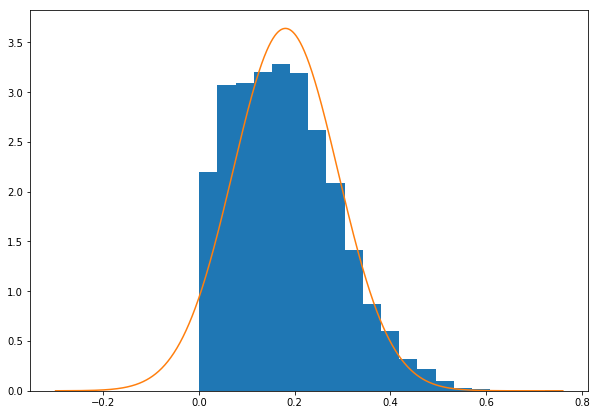

In [14]:
plt.hist(sample, density=True, bins=20);
xs = np.linspace(sample.min() - 0.3, sample.max(), 1000)
mean = sample.mean() 
std = sample.std()
print('mean ', mean)
print('variance ', std ** 2)
plt.plot(xs, sts.norm(mean, std).pdf(xs));

Выборка сильно скошена вправо и все значения положительны.

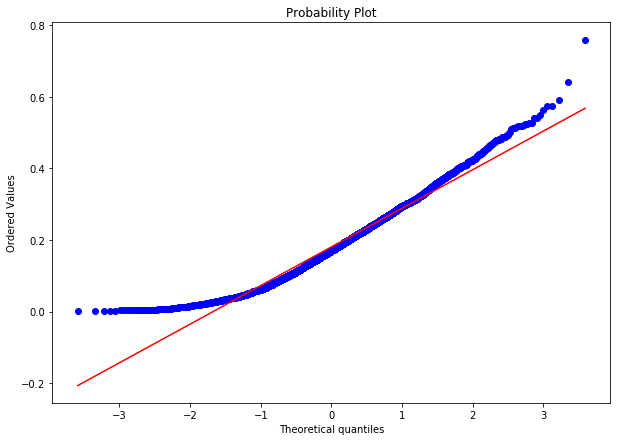

In [15]:
sts.probplot(sample, plot=plt);

Распределение right-skewed. Возможно, это $Gamma$ или $Beta(\alpha, \beta), \alpha < \beta$

Значения принадлежат интервалу (0, 1), поэтому проверим гипотезу о принадлежности бета-распределению c помощью критерия Колмогорова-Смирнова, оценив параметры встроенной функцией.

In [16]:
x  = sample

In [17]:
a1, b1, loc1, scale1 = sts.beta.fit(x)
a1, b1, loc1, scale1

(1.7843738905702813,
 5.977045866640693,
 -0.0027455379759128897,
 0.7935038964413396)

In [18]:
dist = sts.beta(a=a1, b=b1, loc=loc1, scale=scale1)

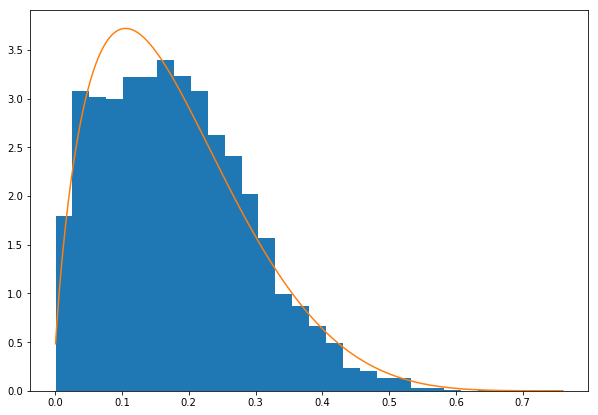

In [19]:
plt.hist(sample, density=True, bins=30);
xs = np.linspace(sample.min(), sample.max(), 1000)
plt.plot(xs, dist.pdf(xs));

In [20]:
sts.kstest(rvs=sample, cdf=dist.cdf)

KstestResult(statistic=0.03512562210385339, pvalue=6.678073300603004e-05)

К сожалению, полученное $p$-value очень мало, поэтому мы вынуждены отвергнуть такую гипотезу. Проверим для Gamma:

In [21]:
a1, loc1, scale1 = sts.gamma.fit(x)
a1, loc1, scale1

(3.230062163322564, -0.027878611894361707, 0.06454129368478606)

In [22]:
dist = sts.gamma(a=a1, loc=loc1, scale=scale1)

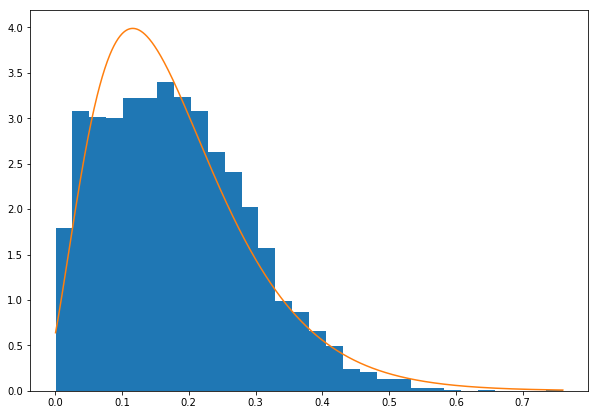

In [23]:
plt.hist(sample, density=True, bins=30);
xs = np.linspace(sample.min(), sample.max(), 1000)
plt.plot(xs, dist.pdf(xs));

In [24]:
sts.kstest(rvs=sample, cdf=dist.cdf)

KstestResult(statistic=0.04375677136154832, pvalue=2.2619213963556344e-07)

Тоже отвергаем. Скорее всего, имеем дело с каким-то более сложным распределением.

## Задача 5

Смоделируем выборку из экспоненциального распределения с плотностью $p(x) = \lambda\exp(-\lambda(x-a))I(x>a), a=6, \lambda=34$

In [25]:
a = 6
lam = 34
N = 1000
gamma = 0.05
exp_dist = sts.expon(loc=a, scale=1/lam)
sample = exp_dist.rvs(N)

In [26]:
ns = np.arange(5, N + 1, 5)

In [27]:
alpha = 0.95
u = sts.norm.ppf((1 + alpha) / 2)
u

1.959963984540054

Функции для непараметрического бутстрепа:

In [28]:
# число бутстрепных выборок
straps_num = N 
# номер n, с которого начинается подсчет
start_from = 5
def bootstrap(distr_sample, grid_step, est_func):
    ns_strap = np.arange(max(start_from, grid_step), N + 1, grid_step)
    var_strap = [None] * len(ns_strap)
    for i, n in enumerate(ns_strap):
        # генерируем N бутстрепных выборок размера n
        samples = np.random.choice(distr_sample[:n], size=(straps_num, n))
        # считаем оценку первого параметра и ее дисперсию для бутстрепной выборки
        ests_strap = np.array([est_func(sample) for sample in samples])
        var_strap[i] = np.mean(ests_strap**2) - (np.mean(ests_strap))**2
    return var_strap
    

Получим интервалы для бутстрепа.

In [29]:
def parametric_distr(param1, param2):
    return sts.expon(loc=param1, scale=1/param2)    

a_func = lambda x: np.mean(x) - 1 / lam

ests = [a_func(sample[:n]) for n in ns]

var_strap = bootstrap(sample, 5, a_func)

In [30]:
boot_lefts = [(ests[i] - u * np.sqrt(var_strap[i])) for i in range(len(ns))]
boot_rights = [(ests[i] + u * np.sqrt(var_strap[i])) for i in range(len(ns))]

Получим асимптотический доверительный интервал из ЦПТ:
$$
\sqrt{n}\left(\overline X - 1/\lambda -a\right) \overset{d}{\longrightarrow} N(0,1)
$$
$$
P\left(\overline X - 1/\lambda - \frac{u_{(1+\alpha)/2}}{\lambda\sqrt{n}}\le a \le \overline X - 1/\lambda + \frac{u_{(1+\alpha)/2}}{\lambda\sqrt{n}} \right) = \alpha
$$
u - квантили нормального распределения.

In [31]:
def plot_CI(lefts, rights, ns, lim=None):
    plt.plot(ns, lefts, c='black', linewidth=0.5)
    plt.plot(ns, rights, c='black', linewidth=0.5)
    plt.fill_between(ns, lefts, rights,
                     color='lightgrey', label=r'ДИ для $a$')
    plt.plot([ns[0], ns[-1]], [a, a], 
             '--', c='red', label=r'Истинное значение $a$')
    plt.legend()
    plt.xlabel(r'$n$')
    if lim:
        plt.ylim(lim[0], lim[1])
        plt.show()

In [32]:
def left(x):
    n = len(x)
    return np.mean(x) - 1 / lam - u / (lam * np.sqrt(n))

def right(x):
    n = len(x)
    return np.mean(x) - 1 / lam + u / (lam * np.sqrt(n))
    

In [33]:
lefts = [left(sample[:n]) for n in ns]
rights = [right(sample[:n]) for n in ns]

Для асимптотического доверительного интервала:

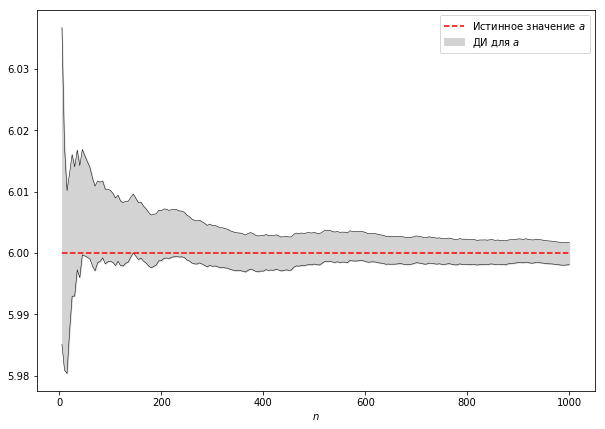

In [34]:
plot_CI(lefts, rights, ns)

Для бутстрепа:
    

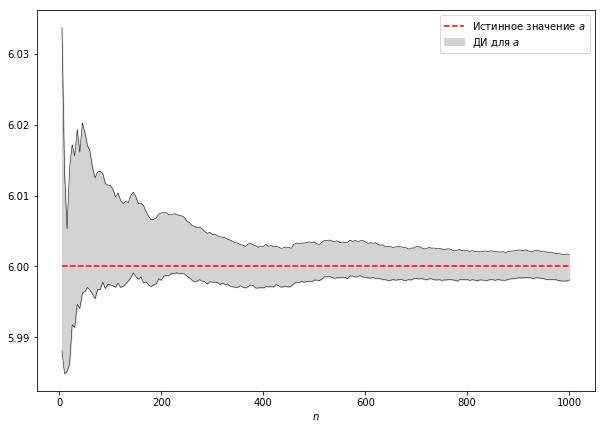

In [35]:
plot_CI(boot_lefts, boot_rights, ns)

In [36]:
def calc_probability(distr, lefts, rights, ns):
    num = 1000
    probs = []
    for i, n in enumerate(ns):
        samples = distr.rvs(size=(num, n))
        xsum = 0
        for s in samples:
            xsum += (lefts[i] < a_func(s) < rights[i])
        probs.append(xsum / num)
    return probs

In [37]:
probs = calc_probability(exp_dist, lefts, rights, ns)
boot_probs = calc_probability(exp_dist, boot_lefts, boot_rights, ns)

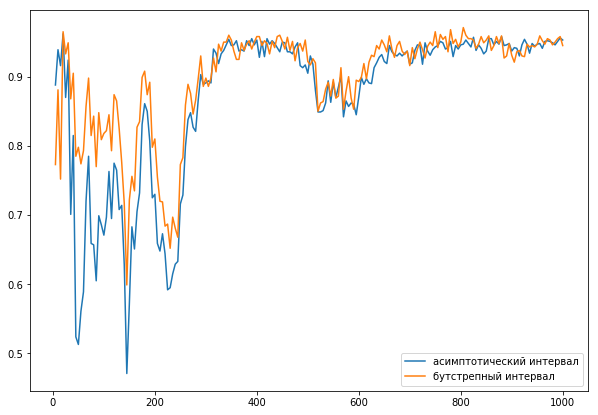

In [38]:
plt.plot(ns, probs, label='асимптотический интервал')
plt.plot(ns, boot_probs, label='бутстрепный интервал')
plt.legend()
plt.show()

Мы видим, что бутстрепный и асимптотический интервал практически совпадают по форме (и следовательно, по вероятности попадания в них). Оба интервала сужаются с ростом n и вероятность попадания в них увеличивается. Это происходит из-за того, что бутстреп является хорошей оценкой асимптотической дисперсии оценки параметра, которая и используется при построении интервалов. При малых n бутстрепный интервал похуже асимптотического, потому что сама бутстрепная оценка тоже улучшается с ростом n.